In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import ComputationalHypergraphDiscovery as CHD
from ComputationalHypergraphDiscovery.Modes import LinearMode, QuadraticMode, GaussianMode
import matplotlib.pyplot as plt
import networkx as nx

# Study all available data

In [3]:
df=pd.read_csv("france_covid_data.csv")
df=df.drop("date",axis=1)
df

,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,...,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,589.0,272296.0,24620.0,107.0,42622.0,2650.0,2.0,2.0,2.0,4.0,...,2556944.0,43551.0,25148369.0,34726580.0,609.0,609.0,55.0,55.0,664.0,664.0
1,1217.0,273513.0,24645.0,229.0,42851.0,2694.0,2.0,2.0,2.0,4.0,...,2559904.0,43914.0,25339091.0,35124318.0,683.0,1292.0,42.0,97.0,725.0,1389.0
2,1627.0,275140.0,24743.0,251.0,43102.0,2666.0,2.0,2.0,2.0,4.0,...,2571299.0,44298.0,25530897.0,35490439.0,384.0,1676.0,19.0,116.0,403.0,1792.0
3,1404.0,276544.0,24560.0,209.0,43311.0,2652.0,2.0,2.0,2.0,4.0,...,2597756.0,44601.0,25723942.0,35889993.0,443.0,2119.0,18.0,134.0,461.0,2253.0
4,1317.0,277861.0,24407.0,177.0,43488.0,2625.0,2.0,2.0,2.0,4.0,...,2617683.0,44852.0,25918163.0,36227201.0,440.0,2559.0,23.0,157.0,463.0,2716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,756.0,822964.0,19272.0,77.0,136447.0,1233.0,0.0,1.0,0.0,0.0,...,3558022.0,147257.0,231965820.0,272612209.0,1957.0,54446241.0,2027.0,53539427.0,3984.0,107985668.0
503,387.0,823351.0,18901.0,42.0,136489.0,1213.0,0.0,1.0,0.0,0.0,...,3558022.0,147331.0,232619554.0,272775929.0,1143.0,54447384.0,1169.0,53540596.0,2312.0,107987980.0
504,145.0,823496.0,18935.0,13.0,136502.0,1214.0,0.0,1.0,0.0,0.0,...,3558022.0,147352.0,233273381.0,272775929.0,280.0,54447664.0,279.0,53540875.0,559.0,107988539.0
505,900.0,824396.0,18742.0,94.0,136596.0,1199.0,0.0,1.0,0.0,0.0,...,3558022.0,147478.0,233928156.0,272775929.0,1178.0,54448842.0,1206.0,53542081.0,2384.0,107990923.0


In [4]:
kernels=[0.1*LinearMode(),0.01*QuadraticMode()]
graph_discovery=CHD.GraphDiscovery.from_dataframe(df,normalize=True,kernels=kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 29/29 [00:04<00:00,  5.89it/s]



Results for current_hospitalized_patients
Kernel [linear] has n/(n+s)=0.2996384727895298, Z=(1.00, 1.00), gamma=1.31e-04
Kernel [quadratic] has n/(n+s)=0.3643649288278356, Z=(0.98, 0.99), gamma=2.27e+01
current_hospitalized_patients has ancestors with the kernel [linear] | (n/(s+n)=0.65 after pruning)


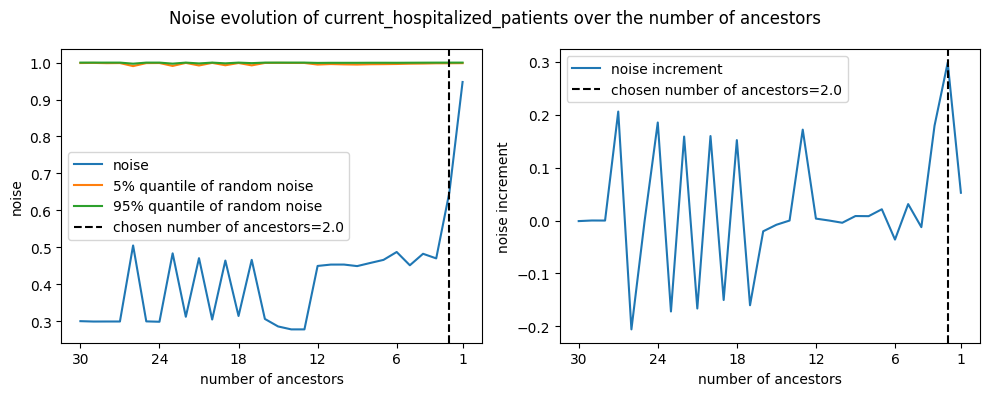

Ancestors of current_hospitalized_patients: ['cumulative_tested', 'cumulative_persons_vaccinated']


Results for workplace_closing
Kernel [linear] has n/(n+s)=0.7250011138356582, Z=(0.99, 1.00), gamma=1.31e+02
Kernel [quadratic] has n/(n+s)=0.7477238152060698, Z=(0.93, 0.96), gamma=1.44e-03
workplace_closing has ancestors with the kernel [linear] | (n/(s+n)=0.77 after pruning)


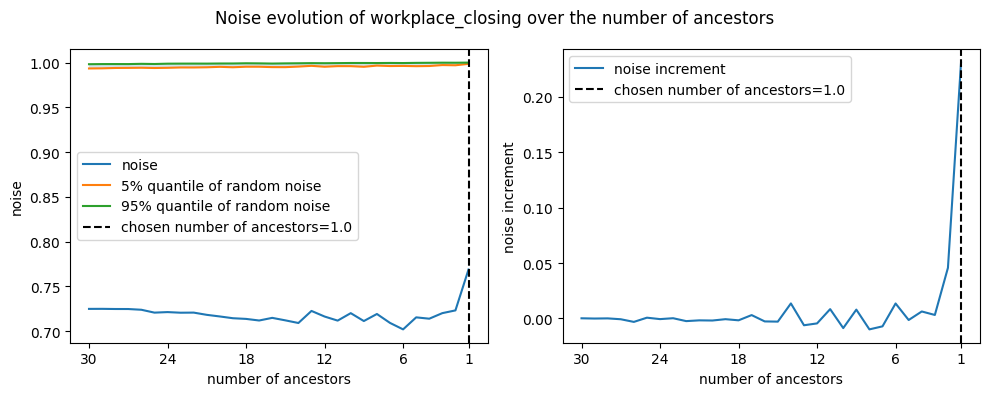

Ancestors of workplace_closing: ['restrictions_on_gatherings']



Finding ancestors with kernel [quadratic]: 100%|██████████| 29/29 [00:34<00:00,  1.18s/it]



Results for new_hospitalized_patients
Kernel [linear] has n/(n+s)=0.4673835230181967, Z=(0.99, 1.00), gamma=3.88e+01
Kernel [quadratic] has n/(n+s)=0.39384395074615974, Z=(0.97, 0.99), gamma=1.06e+01
new_hospitalized_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.72 after pruning)


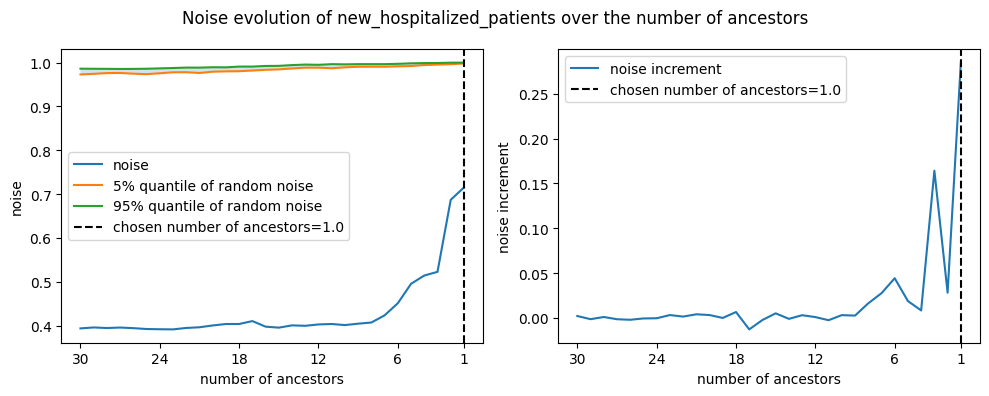

Ancestors of new_hospitalized_patients: ['new_intensive_care_patients']


Results for cumulative_hospitalized_patients
Kernel [linear] has n/(n+s)=0.22099069700745888, Z=(0.99, 1.00), gamma=4.36e+00
Kernel [quadratic] has n/(n+s)=0.10151125403307276, Z=(0.94, 0.96), gamma=1.93e-02
cumulative_hospitalized_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.10 after pruning)


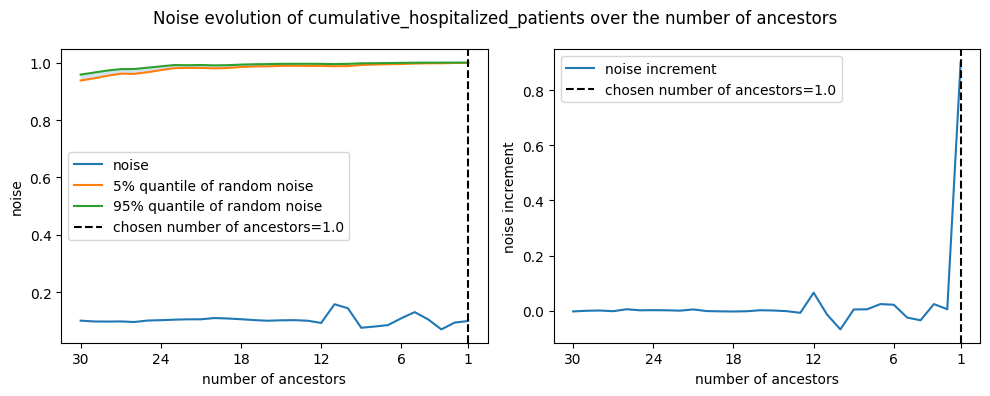

Ancestors of cumulative_hospitalized_patients: ['new_recovered']


Results for new_intensive_care_patients
Kernel [linear] has n/(n+s)=0.5414480124642933, Z=(0.99, 1.00), gamma=3.88e+01
Kernel [quadratic] has n/(n+s)=0.5012035469295546, Z=(0.98, 0.99), gamma=2.71e+01
new_intensive_care_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.71 after pruning)


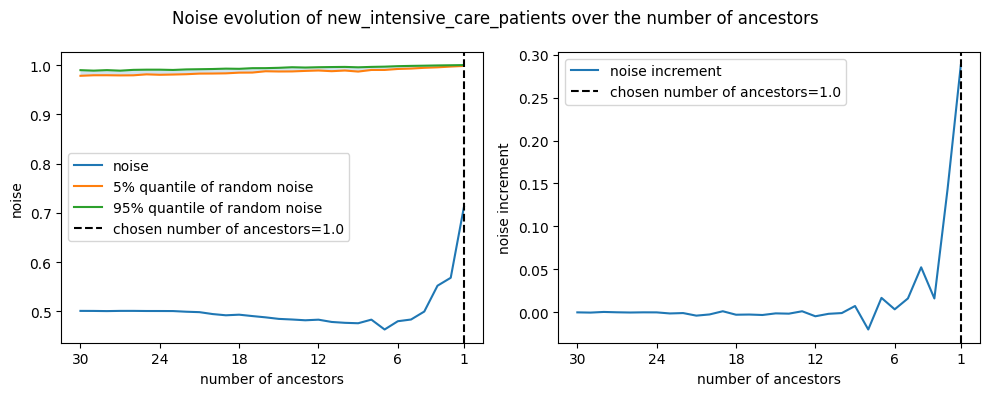

Ancestors of new_intensive_care_patients: ['new_hospitalized_patients']


Results for cumulative_intensive_care_patients
Kernel [linear] has n/(n+s)=0.19901262648126217, Z=(0.99, 1.00), gamma=4.12e+00
Kernel [quadratic] has n/(n+s)=0.12125095585567996, Z=(0.94, 0.96), gamma=1.43e-02
cumulative_intensive_care_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.16 after pruning)


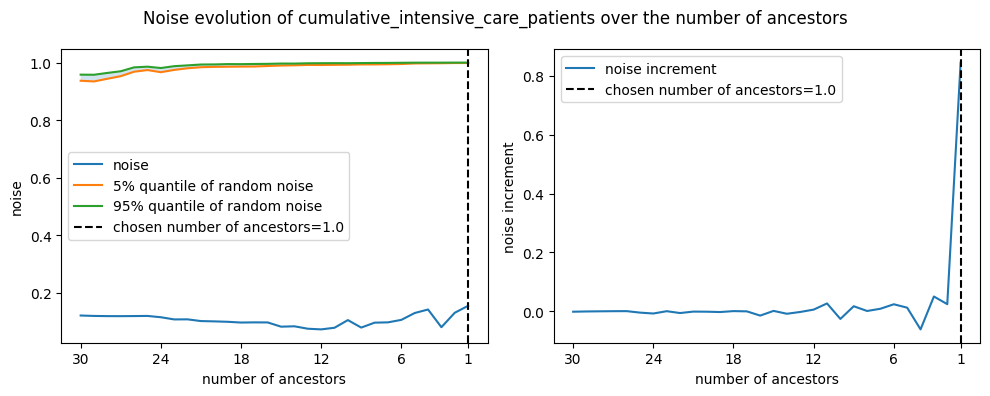

Ancestors of cumulative_intensive_care_patients: ['new_recovered']


Results for current_intensive_care_patients
Kernel [linear] has n/(n+s)=0.5174404604836668, Z=(0.99, 1.00), gamma=2.49e+01
Kernel [quadratic] has n/(n+s)=0.3778124425512412, Z=(0.96, 0.98), gamma=2.64e+00
current_intensive_care_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.76 after pruning)


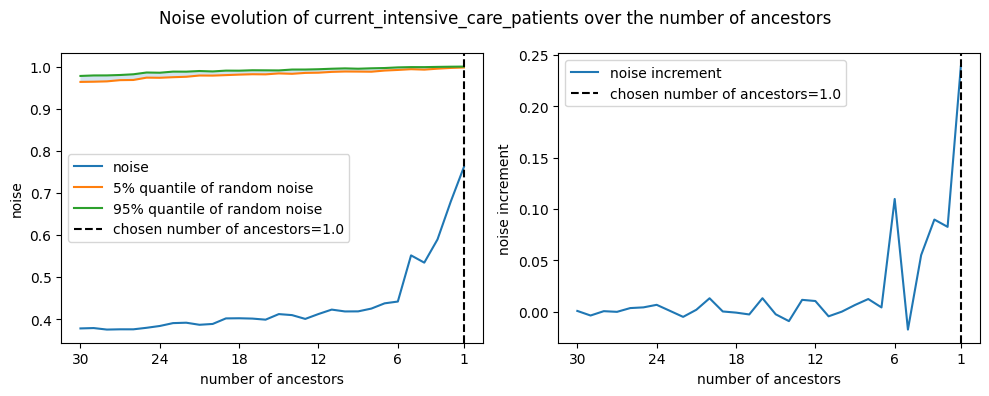

Ancestors of current_intensive_care_patients: ['new_intensive_care_patients']


Results for school_closing
Kernel [linear] has n/(n+s)=0.637903805270409, Z=(0.99, 1.00), gamma=7.89e+00
Kernel [quadratic] has n/(n+s)=0.42466907709880736, Z=(0.94, 0.96), gamma=3.20e-02
school_closing has ancestors with the kernel [quadratic] | (n/(s+n)=0.42 after pruning)


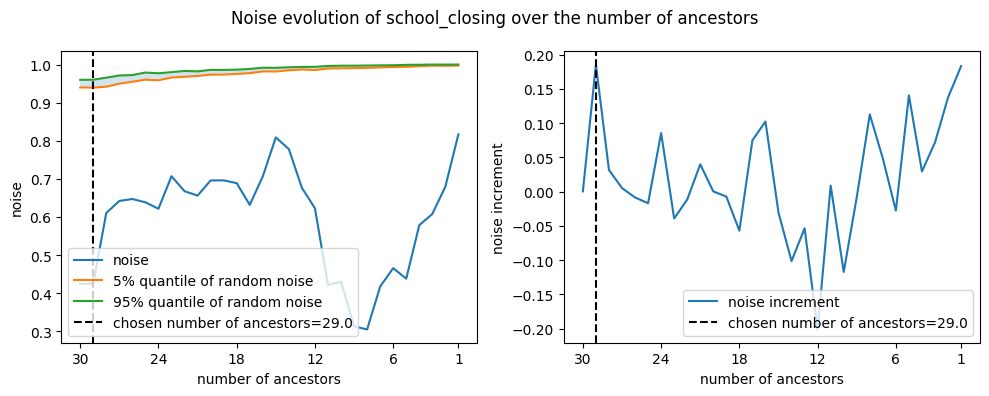

Ancestors of school_closing: ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated', 'cumulative_vaccine_doses_administered']


Results for cancel_public_events
Kernel [linear] has n/(n+s)=0.5304769604514104, Z=(0.99, 1.00), gamma=5.87e+01
Kernel [quadratic] has n/(n+s)=0.07595560220602031, Z=(0.93, 0.96), gamma=1.54

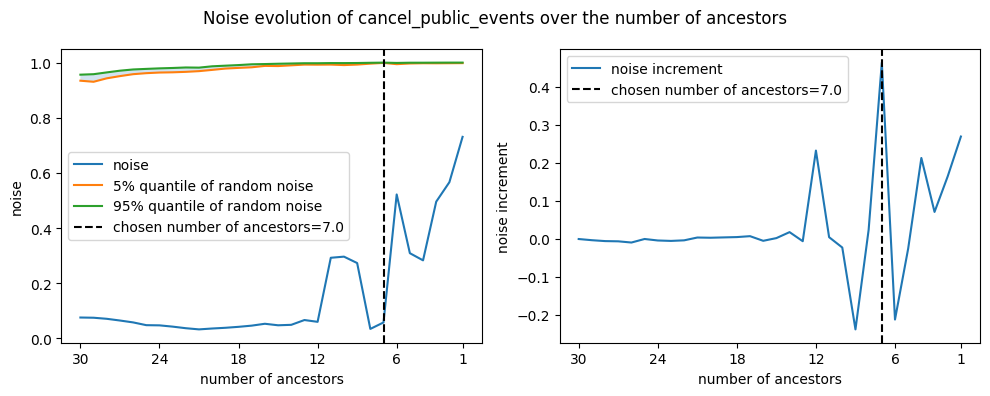

Ancestors of cancel_public_events: ['workplace_closing', 'restrictions_on_gatherings', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'vaccination_policy', 'stringency_index']


Results for restrictions_on_gatherings
Kernel [linear] has n/(n+s)=0.5414349214068073, Z=(0.99, 1.00), gamma=1.23e+02
Kernel [quadratic] has n/(n+s)=0.11768187251389715, Z=(0.93, 0.96), gamma=1.41e-03
restrictions_on_gatherings has ancestors with the kernel [quadratic] | (n/(s+n)=0.67 after pruning)


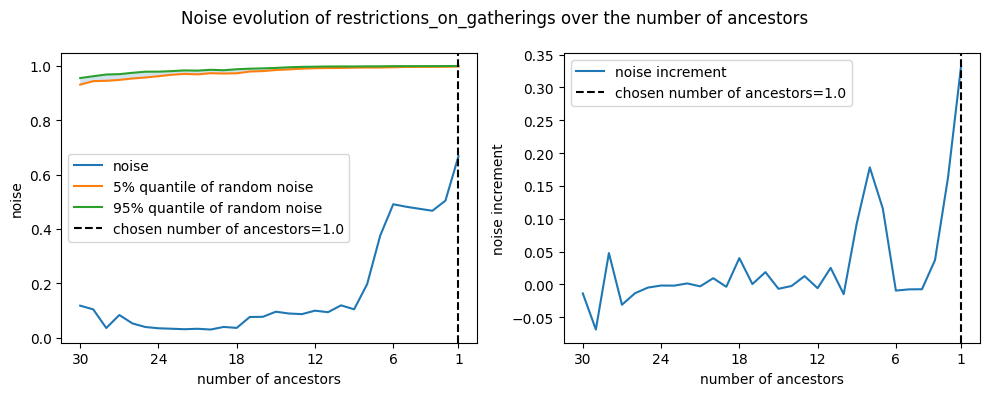

Ancestors of restrictions_on_gatherings: ['cumulative_recovered']


Results for public_transport_closing
Kernel [linear] has n/(n+s)=0.4070873342707549, Z=(0.99, 1.00), gamma=3.70e+01
Kernel [quadratic] has n/(n+s)=0.08270202828101347, Z=(0.93, 0.96), gamma=1.51e-03
public_transport_closing has ancestors with the kernel [quadratic] | (n/(s+n)=0.26 after pruning)


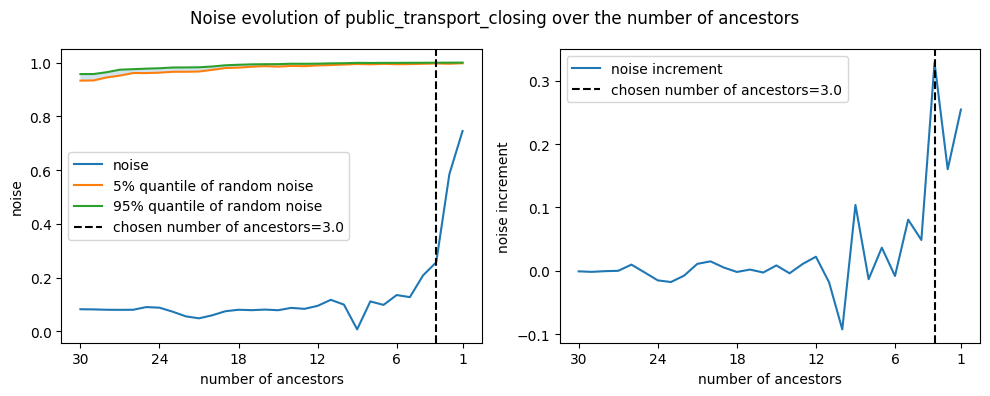

Ancestors of public_transport_closing: ['stay_at_home_requirements', 'restrictions_on_internal_movement', 'cumulative_vaccine_doses_administered']


Results for stay_at_home_requirements
Kernel [linear] has n/(n+s)=0.5029339504745562, Z=(0.99, 1.00), gamma=1.03e+02
Kernel [quadratic] has n/(n+s)=0.41435307735545984, Z=(0.93, 0.96), gamma=1.40e-03
stay_at_home_requirements has ancestors with the kernel [quadratic] | (n/(s+n)=0.50 after pruning)


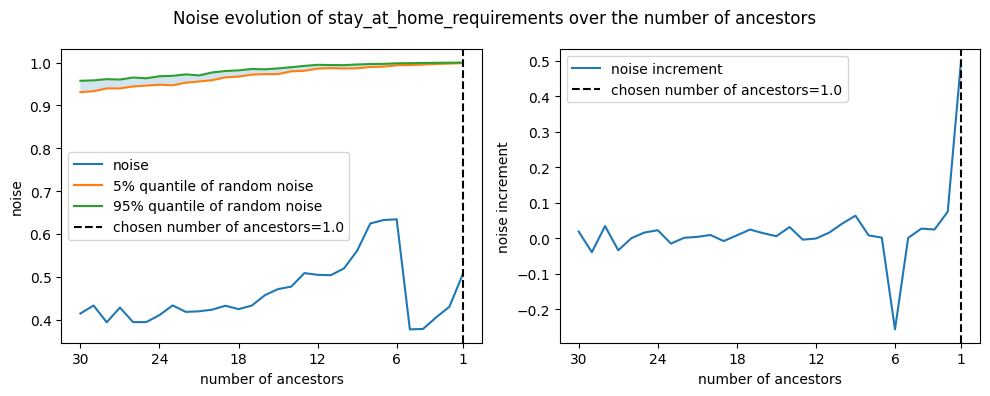

Ancestors of stay_at_home_requirements: ['cumulative_persons_fully_vaccinated']


Results for restrictions_on_internal_movement
Kernel [linear] has n/(n+s)=0.5724428693960895, Z=(0.99, 1.00), gamma=8.15e-02
Kernel [quadratic] has n/(n+s)=0.2649714937689903, Z=(0.95, 0.97), gamma=1.50e-01
restrictions_on_internal_movement has ancestors with the kernel [quadratic] | (n/(s+n)=0.29 after pruning)


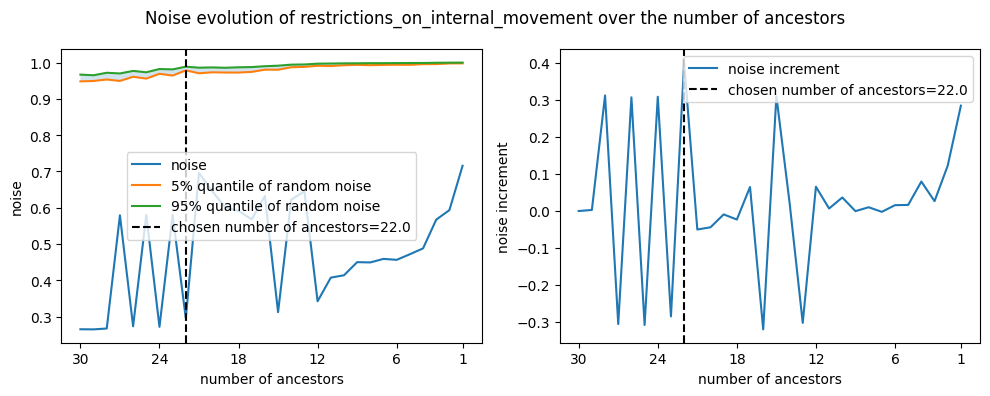

Ancestors of restrictions_on_internal_movement: ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_recovered', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated', 'cumulative_vaccine_doses_administered']


Results for income_support
Kernel [linear] has n/(n+s)=0.46713855526773057, Z=(0.99, 1.00), gamma=1.30e+02
Kernel [quadratic] has n/(n+s)=0.021914926302087454, Z=(0.93, 0.96), gamma=3.89e-05
income_support has ancestors with the kernel [quadratic] | (n/(s+n)=0.67 after pruning)


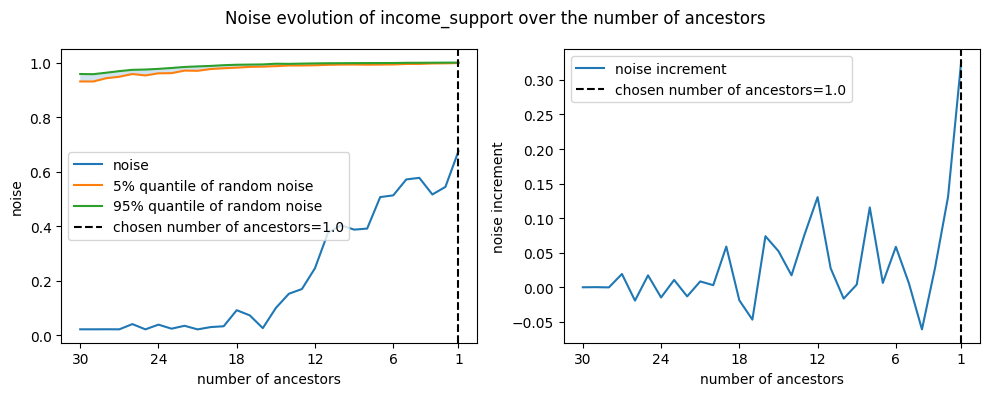

Ancestors of income_support: ['restrictions_on_gatherings']


Results for facial_coverings
Kernel [linear] has n/(n+s)=0.6196985184900704, Z=(0.99, 1.00), gamma=2.56e+02
Kernel [quadratic] has n/(n+s)=0.590339586725666, Z=(0.99, 0.99), gamma=1.69e+02
facial_coverings has ancestors with the kernel [quadratic] | (n/(s+n)=0.67 after pruning)


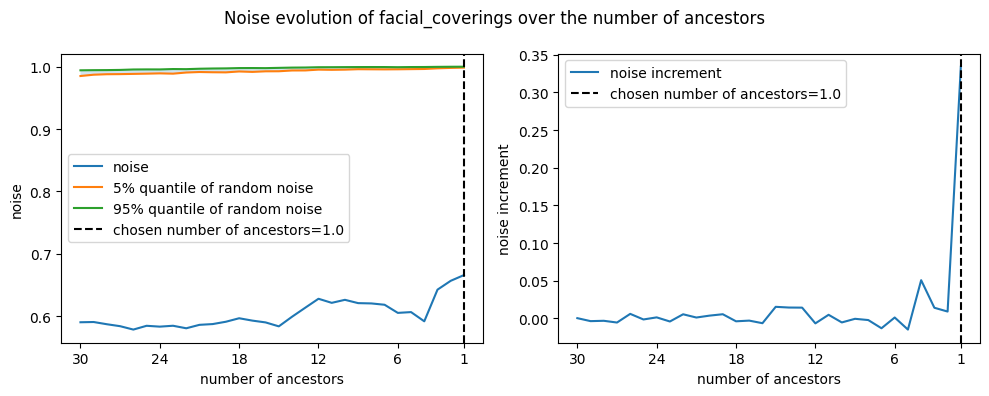

Ancestors of facial_coverings: ['stay_at_home_requirements']


Results for vaccination_policy
Kernel [linear] has n/(n+s)=0.49897111700256186, Z=(0.99, 1.00), gamma=6.98e+01
Kernel [quadratic] has n/(n+s)=0.38868198745322147, Z=(0.99, 0.99), gamma=2.07e+02
vaccination_policy has ancestors with the kernel [quadratic] | (n/(s+n)=0.57 after pruning)


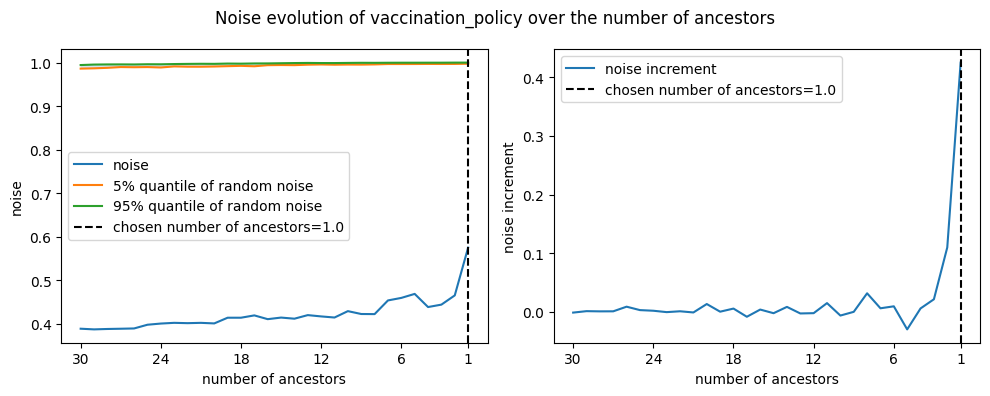

Ancestors of vaccination_policy: ['cumulative_deceased']


Results for stringency_index
Kernel [linear] has n/(n+s)=0.18350178432444023, Z=(0.99, 1.00), gamma=1.53e+00
Kernel [quadratic] has n/(n+s)=0.1348325710624931, Z=(0.95, 0.97), gamma=5.77e-01
stringency_index has ancestors with the kernel [quadratic] | (n/(s+n)=0.63 after pruning)


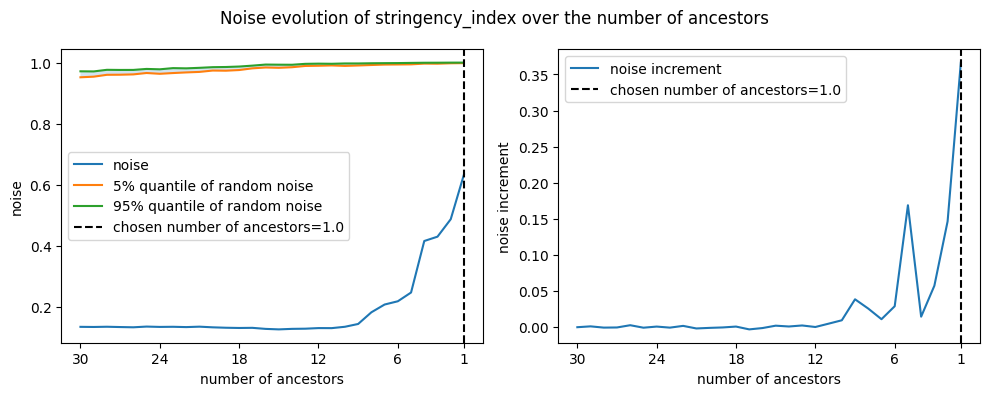

Ancestors of stringency_index: ['cancel_public_events']


Results for new_confirmed
Kernel [linear] has n/(n+s)=0.8114204436976099, Z=(0.99, 1.00), gamma=1.01e+02
Kernel [quadratic] has n/(n+s)=0.725822740152849, Z=(0.99, 0.99), gamma=1.65e+02
new_confirmed has ancestors with the kernel [quadratic] | (n/(s+n)=0.85 after pruning)


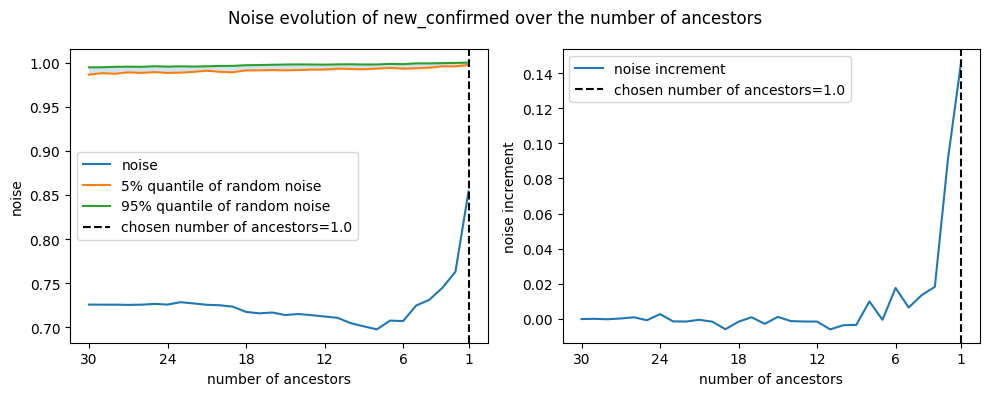

Ancestors of new_confirmed: ['new_hospitalized_patients']


Results for new_deceased
Kernel [linear] has n/(n+s)=0.6858947644035974, Z=(0.99, 1.00), gamma=1.02e+02
Kernel [quadratic] has n/(n+s)=0.6701406244208837, Z=(0.98, 0.99), gamma=8.04e+01
new_deceased has ancestors with the kernel [quadratic] | (n/(s+n)=0.75 after pruning)


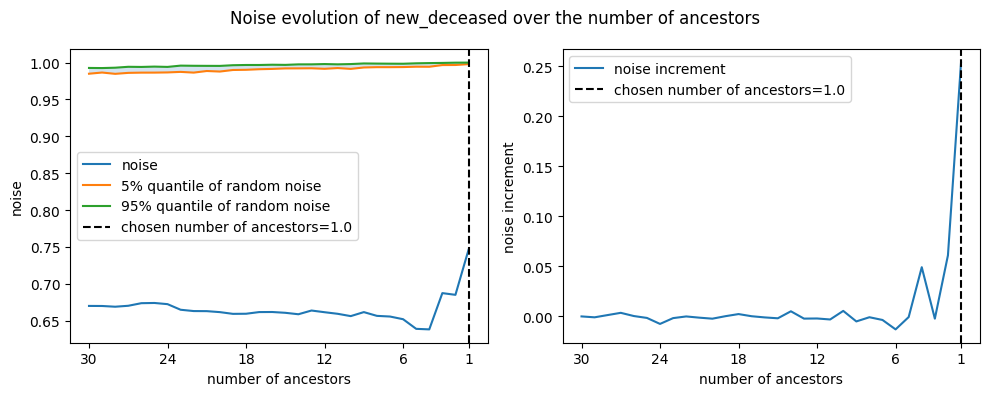

Ancestors of new_deceased: ['new_intensive_care_patients']


Results for new_recovered
Kernel [linear] has n/(n+s)=0.24882464662013803, Z=(0.99, 1.00), gamma=4.36e+00
Kernel [quadratic] has n/(n+s)=0.10648101523997194, Z=(0.94, 0.96), gamma=2.18e-02
new_recovered has ancestors with the kernel [quadratic] | (n/(s+n)=0.10 after pruning)


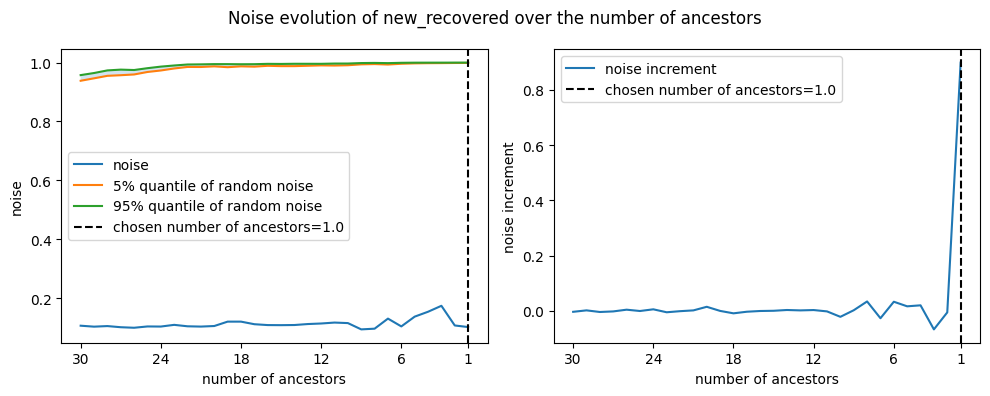

Ancestors of new_recovered: ['cumulative_hospitalized_patients']


Results for new_tested
Kernel [linear] has n/(n+s)=0.7077781445121818, Z=(0.99, 1.00), gamma=2.22e+01
Kernel [quadratic] has n/(n+s)=0.6136277848190376, Z=(0.98, 0.99), gamma=1.93e+01
new_tested has ancestors with the kernel [quadratic] | (n/(s+n)=0.77 after pruning)


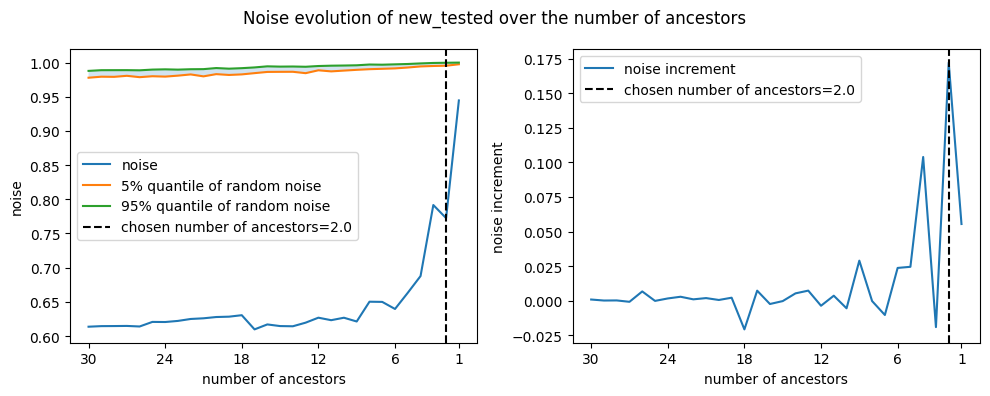

Ancestors of new_tested: ['new_intensive_care_patients', 'public_transport_closing']


Results for cumulative_confirmed
Kernel [linear] has n/(n+s)=0.5581567406364842, Z=(1.00, 1.00), gamma=5.91e-05
Kernel [quadratic] has n/(n+s)=0.3149633159896409, Z=(0.94, 0.96), gamma=5.75e-03
cumulative_confirmed has ancestors with the kernel [quadratic] | (n/(s+n)=0.55 after pruning)


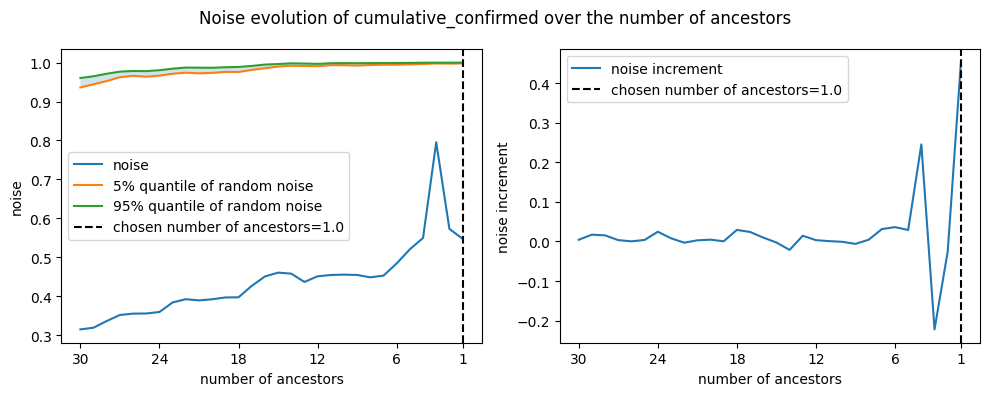

Ancestors of cumulative_confirmed: ['cumulative_deceased']


Results for cumulative_deceased
Kernel [linear] has n/(n+s)=0.27296731986756484, Z=(0.99, 1.00), gamma=2.42e+01
Kernel [quadratic] has n/(n+s)=0.2603380683764174, Z=(0.98, 0.99), gamma=9.84e+01
cumulative_deceased has ancestors with the kernel [quadratic] | (n/(s+n)=0.38 after pruning)


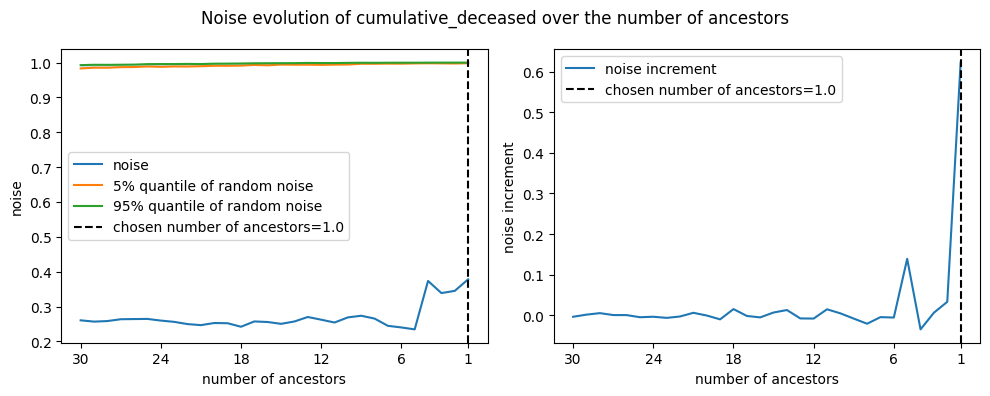

Ancestors of cumulative_deceased: ['cumulative_intensive_care_patients']


Results for cumulative_recovered
Kernel [linear] has n/(n+s)=0.23866830147857387, Z=(0.99, 1.00), gamma=6.36e+01
Kernel [quadratic] has n/(n+s)=0.18789372536943602, Z=(0.98, 0.99), gamma=2.13e+01
cumulative_recovered has ancestors with the kernel [quadratic] | (n/(s+n)=0.20 after pruning)


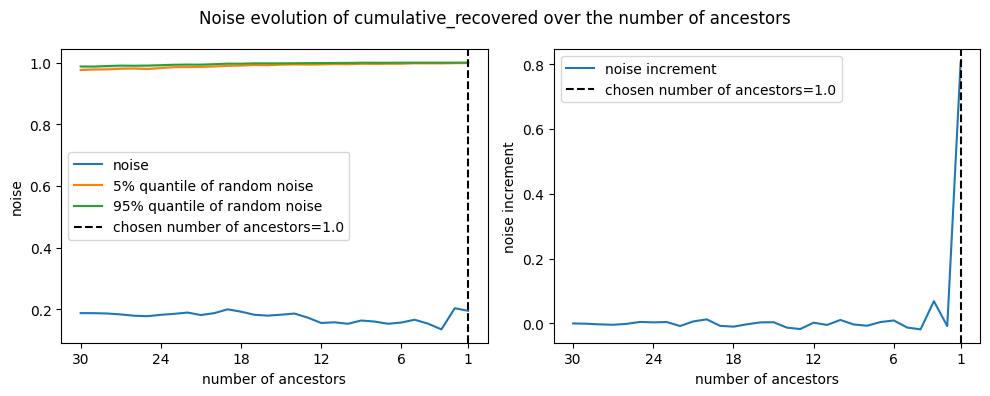

Ancestors of cumulative_recovered: ['cumulative_tested']


Results for cumulative_tested
Kernel [linear] has n/(n+s)=0.24749972694611008, Z=(0.99, 1.00), gamma=3.41e+01
Kernel [quadratic] has n/(n+s)=0.12671354562740264, Z=(0.97, 0.98), gamma=6.99e+00
cumulative_tested has ancestors with the kernel [quadratic] | (n/(s+n)=0.19 after pruning)


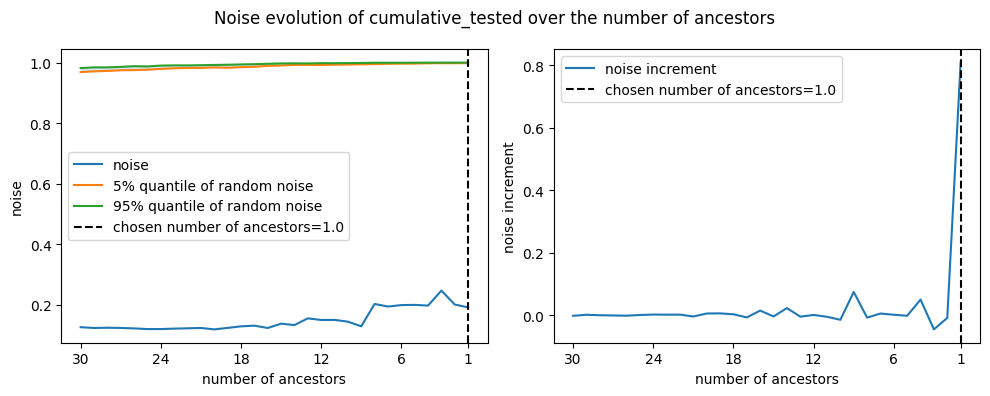

Ancestors of cumulative_tested: ['cumulative_recovered']


Results for new_persons_vaccinated
Kernel [linear] has n/(n+s)=0.5342526718834322, Z=(0.99, 1.00), gamma=3.54e+00
Kernel [quadratic] has n/(n+s)=0.09589135783114655, Z=(0.93, 0.96), gamma=1.12e-03
new_persons_vaccinated has ancestors with the kernel [quadratic] | (n/(s+n)=0.58 after pruning)


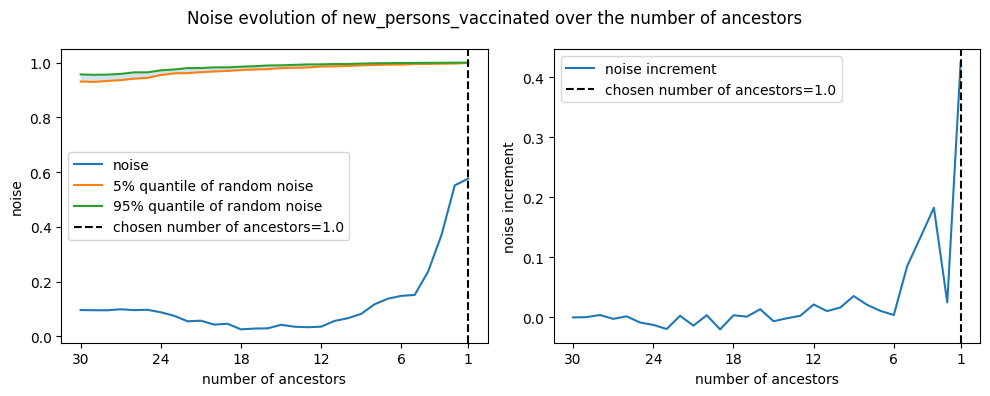

Ancestors of new_persons_vaccinated: ['new_vaccine_doses_administered']


Results for cumulative_persons_vaccinated
Kernel [linear] has n/(n+s)=0.21541561335309797, Z=(0.99, 1.00), gamma=4.06e+01
Kernel [quadratic] has n/(n+s)=0.12462770278498954, Z=(0.97, 0.98), gamma=1.02e+01
cumulative_persons_vaccinated has ancestors with the kernel [quadratic] | (n/(s+n)=0.09 after pruning)


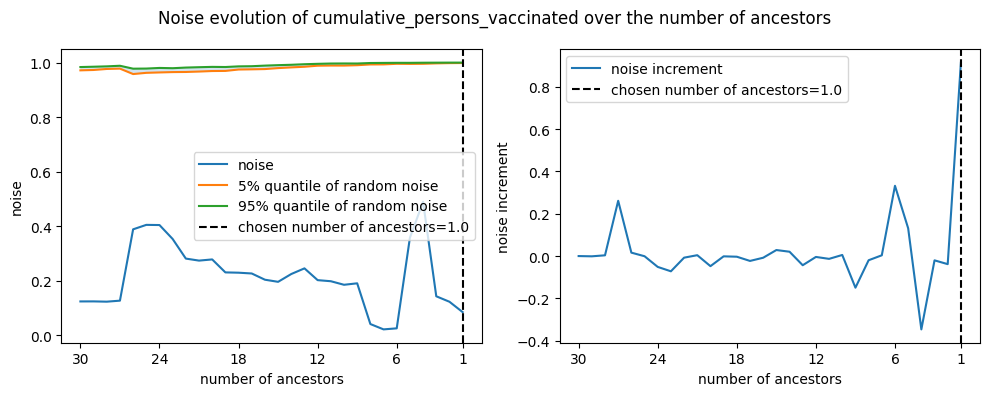

Ancestors of cumulative_persons_vaccinated: ['cumulative_vaccine_doses_administered']


Results for new_persons_fully_vaccinated
Kernel [linear] has n/(n+s)=0.4703289416853023, Z=(0.99, 1.00), gamma=3.59e+00
Kernel [quadratic] has n/(n+s)=0.07839923827236782, Z=(0.93, 0.96), gamma=1.19e-03
new_persons_fully_vaccinated has ancestors with the kernel [quadratic] | (n/(s+n)=0.52 after pruning)


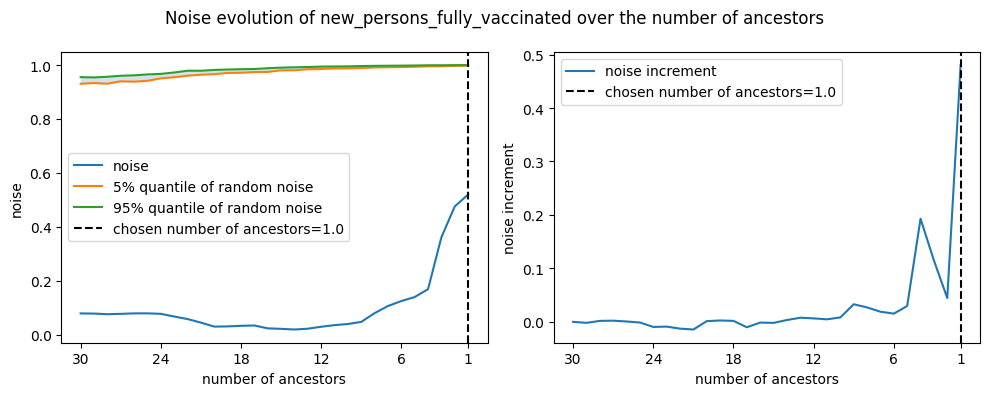

Ancestors of new_persons_fully_vaccinated: ['new_vaccine_doses_administered']


Results for cumulative_persons_fully_vaccinated
Kernel [linear] has n/(n+s)=0.19913779889167238, Z=(0.99, 1.00), gamma=3.53e+01
Kernel [quadratic] has n/(n+s)=0.13064460755969473, Z=(0.97, 0.98), gamma=1.14e+01
cumulative_persons_fully_vaccinated has ancestors with the kernel [quadratic] | (n/(s+n)=0.13 after pruning)


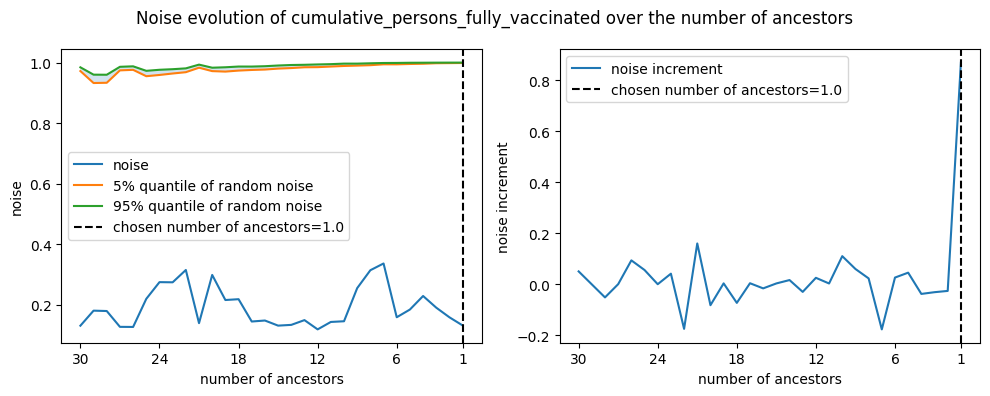

Ancestors of cumulative_persons_fully_vaccinated: ['cumulative_vaccine_doses_administered']


Results for new_vaccine_doses_administered
Kernel [linear] has n/(n+s)=0.11017830812836606, Z=(0.99, 1.00), gamma=3.79e+00
Kernel [quadratic] has n/(n+s)=0.019373088822817925, Z=(0.93, 0.95), gamma=1.33e-03
new_vaccine_doses_administered has ancestors with the kernel [quadratic] | (n/(s+n)=0.58 after pruning)


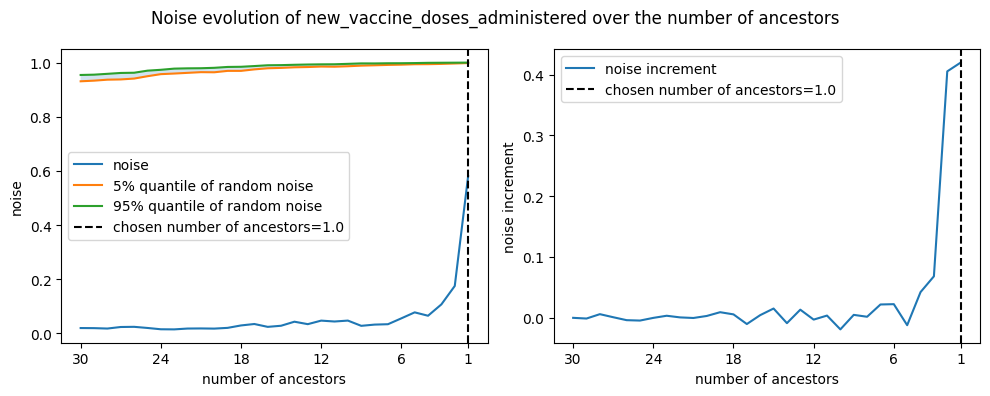

Ancestors of new_vaccine_doses_administered: ['new_persons_vaccinated']


Results for cumulative_vaccine_doses_administered
Kernel [linear] has n/(n+s)=0.1880077188422539, Z=(0.99, 1.00), gamma=3.34e+01
Kernel [quadratic] has n/(n+s)=0.08854003654598025, Z=(0.93, 0.96), gamma=1.90e-03
cumulative_vaccine_doses_administered has ancestors with the kernel [quadratic] | (n/(s+n)=0.11 after pruning)


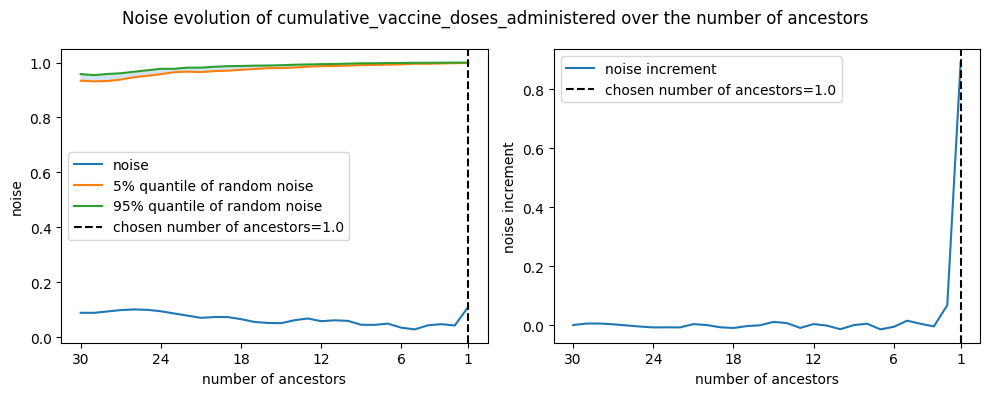

Ancestors of cumulative_vaccine_doses_administered: ['cumulative_persons_fully_vaccinated']



In [5]:
graph_discovery.fit()

In [6]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

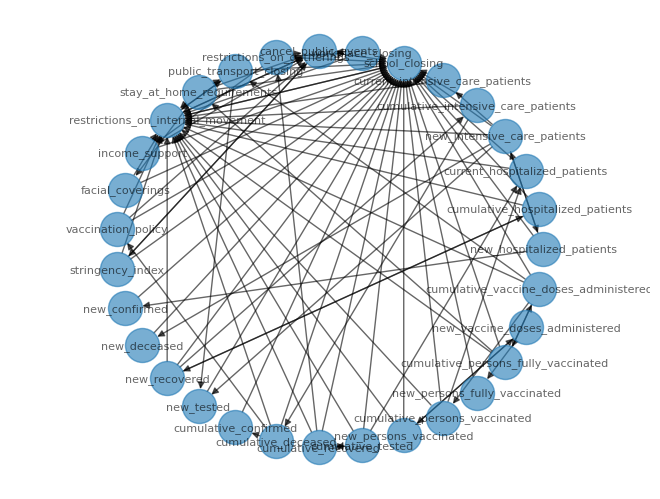

In [7]:
plot_a_network(graph_discovery.G,False)

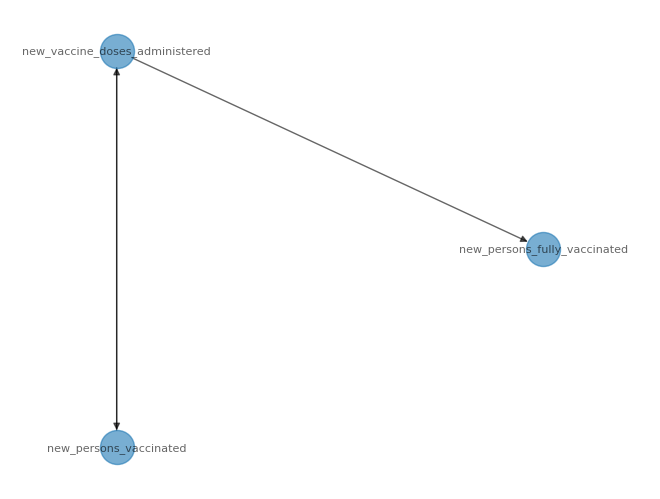

In [8]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_persons_fully_vaccinated',undirected=False,radius=2).reverse())

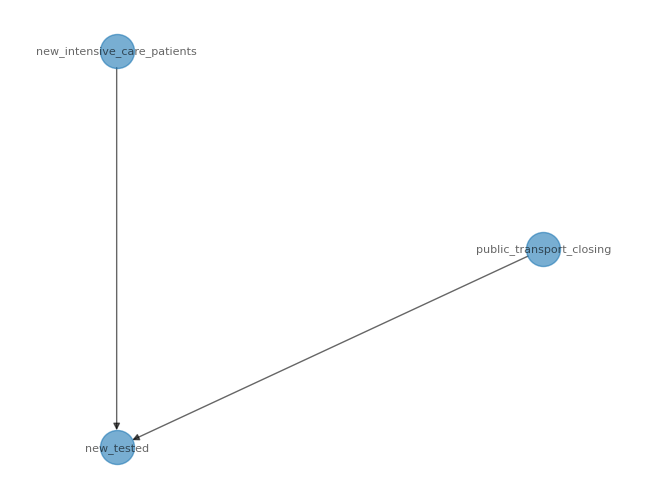

In [9]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_tested',undirected=False,radius=1).reverse(),False)

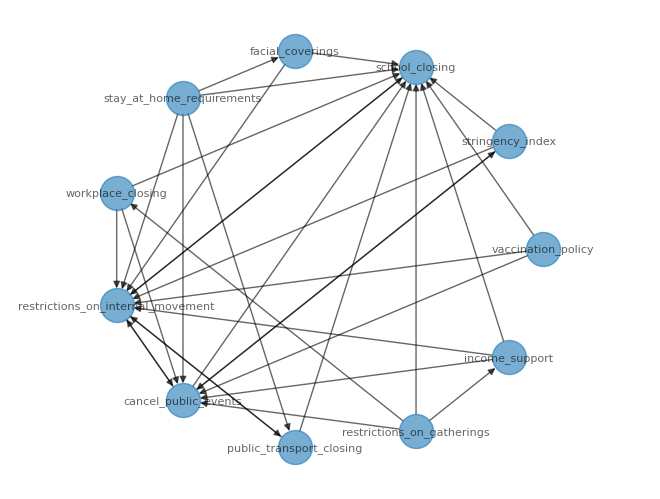

In [10]:
G_gov=graph_discovery.G.subgraph([
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index'])
plot_a_network(G_gov,False)

# Delete redundant information

In [11]:
reduced_names = ['new_hospitalized_patients',
 'current_hospitalized_patients',
 'stay_at_home_requirements',
 'new_confirmed',
 'new_deceased',
 'new_recovered',
 'new_tested',
 'new_persons_vaccinated']
df_reduced=df[reduced_names]

Finding ancestors with kernel [linear]: 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]



Results for new_hospitalized_patients
Kernel [linear] has n/(n+s)=0.518500950345465, Z=(0.99, 1.00), gamma=3.56e+01
Kernel [quadratic] has n/(n+s)=0.534540449920895, Z=(0.99, 1.00), gamma=2.44e+01
Kernel [gaussian] has n/(n+s)=0.7438000454827898, Z=(0.83, 0.87), gamma=2.16e-04
new_hospitalized_patients has ancestors with the kernel [linear] | (n/(s+n)=0.77 after pruning)


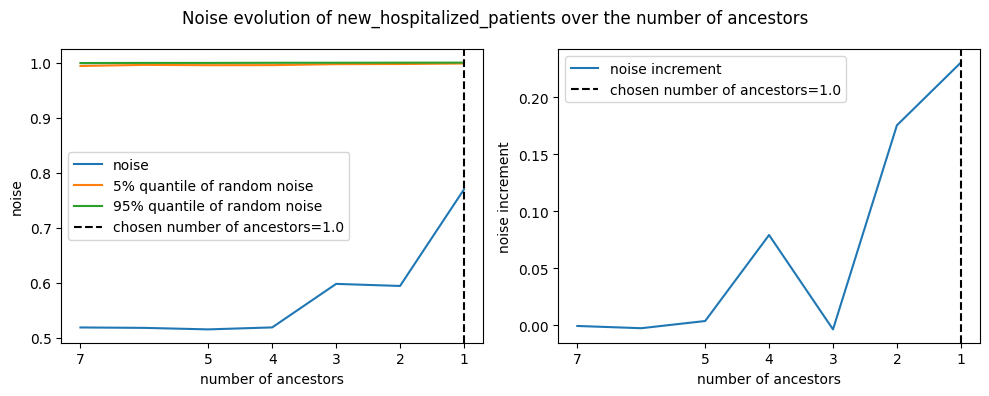

Ancestors of new_hospitalized_patients: ['new_deceased']



Finding ancestors with kernel [quadratic]: 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]



Results for current_hospitalized_patients
Kernel [linear] has n/(n+s)=0.5895681587102879, Z=(0.99, 1.00), gamma=2.18e+01
Kernel [quadratic] has n/(n+s)=0.5196882461176974, Z=(0.99, 1.00), gamma=1.72e+01
Kernel [gaussian] has n/(n+s)=0.5421437466321496, Z=(0.82, 0.87), gamma=2.80e-04
current_hospitalized_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.80 after pruning)


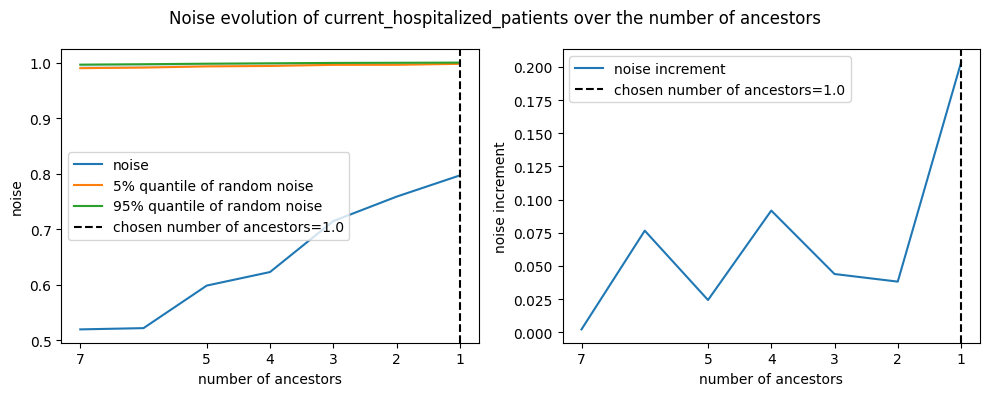

Ancestors of current_hospitalized_patients: ['new_hospitalized_patients']


Results for new_deceased
Kernel [linear] has n/(n+s)=0.6560996791557967, Z=(0.99, 1.00), gamma=4.30e+01
Kernel [quadratic] has n/(n+s)=0.6408988967226381, Z=(0.99, 1.00), gamma=3.85e+01
Kernel [gaussian] has n/(n+s)=0.7446766992081164, Z=(0.83, 0.88), gamma=1.72e-04
new_deceased has ancestors with the kernel [quadratic] | (n/(s+n)=0.77 after pruning)


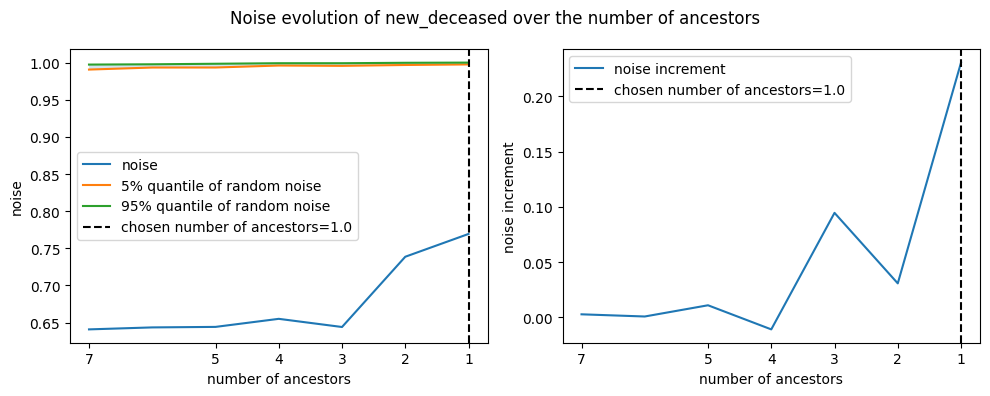

Ancestors of new_deceased: ['new_hospitalized_patients']


Results for new_recovered
Kernel [linear] has n/(n+s)=0.7296206265402704, Z=(0.99, 1.00), gamma=1.45e+01
Kernel [quadratic] has n/(n+s)=0.5285312225146277, Z=(0.99, 1.00), gamma=7.42e+00
Kernel [gaussian] has n/(n+s)=0.6914688440576221, Z=(0.82, 0.86), gamma=3.74e-04
new_recovered has ancestors with the kernel [quadratic] | (n/(s+n)=0.79 after pruning)


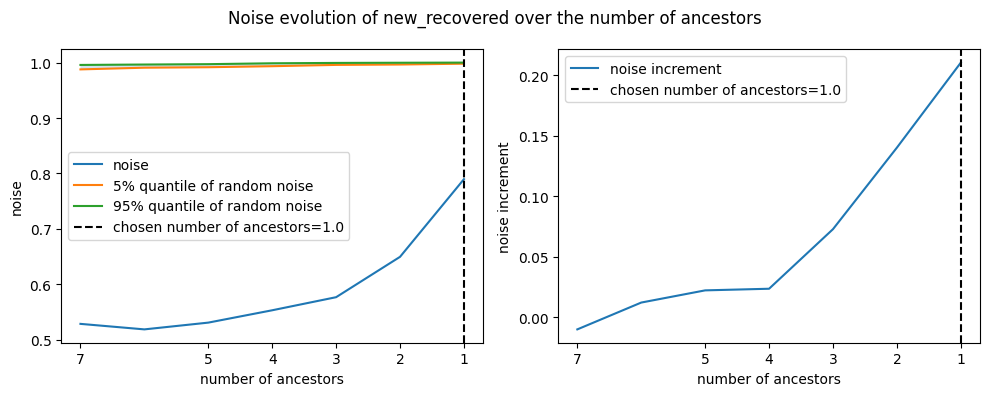

Ancestors of new_recovered: ['stay_at_home_requirements']


Results for new_tested
Kernel [linear] has n/(n+s)=0.7705972238576694, Z=(0.99, 1.00), gamma=1.68e+01
Kernel [quadratic] has n/(n+s)=0.6777565323233097, Z=(0.99, 1.00), gamma=5.31e+00
Kernel [gaussian] has n/(n+s)=0.6824751686159147, Z=(0.98, 0.99), gamma=4.45e+00
new_tested has ancestors with the kernel [quadratic] | (n/(s+n)=0.68 after pruning)


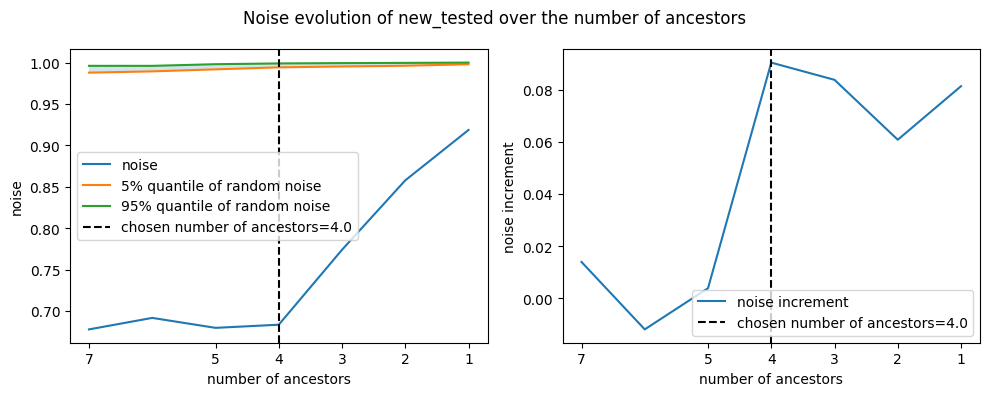

Ancestors of new_tested: ['new_hospitalized_patients', 'current_hospitalized_patients', 'stay_at_home_requirements', 'new_recovered']



Finding ancestors with kernel [gaussian]: 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]



Results for stay_at_home_requirements
Kernel [linear] has n/(n+s)=0.5544251401070239, Z=(0.99, 1.00), gamma=2.94e+01
Kernel [quadratic] has n/(n+s)=0.487762621526891, Z=(0.99, 1.00), gamma=1.82e+01
Kernel [gaussian] has n/(n+s)=0.47972998679459367, Z=(0.99, 1.00), gamma=1.87e+01
stay_at_home_requirements has ancestors with the kernel [gaussian] | (n/(s+n)=0.77 after pruning)


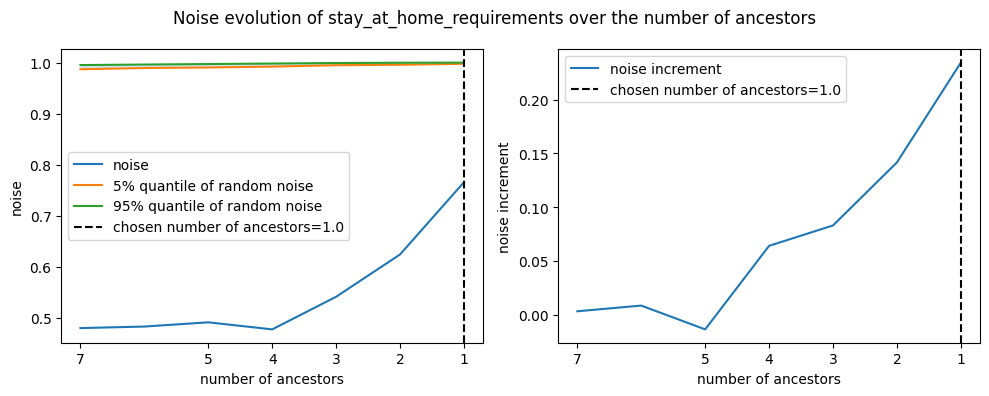

Ancestors of stay_at_home_requirements: ['new_recovered']


Results for new_confirmed
Kernel [linear] has n/(n+s)=0.7853850644172392, Z=(0.99, 1.00), gamma=5.57e+01
Kernel [quadratic] has n/(n+s)=0.7332356990206634, Z=(0.99, 1.00), gamma=7.26e+01
Kernel [gaussian] has n/(n+s)=0.598371290259526, Z=(0.81, 0.86), gamma=2.56e-04
new_confirmed has ancestors with the kernel [gaussian] | (n/(s+n)=0.75 after pruning)


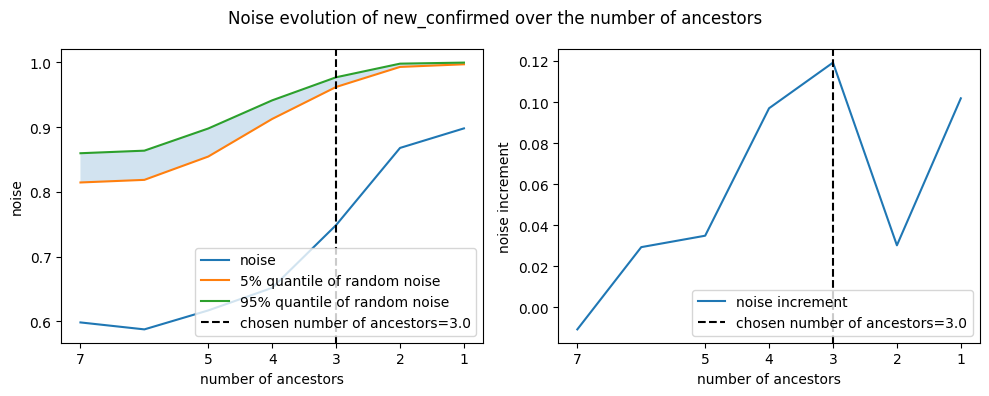

Ancestors of new_confirmed: ['current_hospitalized_patients', 'new_recovered', 'new_tested']


Results for new_persons_vaccinated
Kernel [linear] has n/(n+s)=0.9136122545038005, Z=(1.00, 1.00), gamma=1.75e+01
Kernel [quadratic] has n/(n+s)=0.748612916978421, Z=(0.99, 1.00), gamma=1.66e+00
Kernel [gaussian] has n/(n+s)=0.6077289574391979, Z=(0.95, 0.97), gamma=1.30e-01
new_persons_vaccinated has ancestors with the kernel [gaussian] | (n/(s+n)=0.86 after pruning)


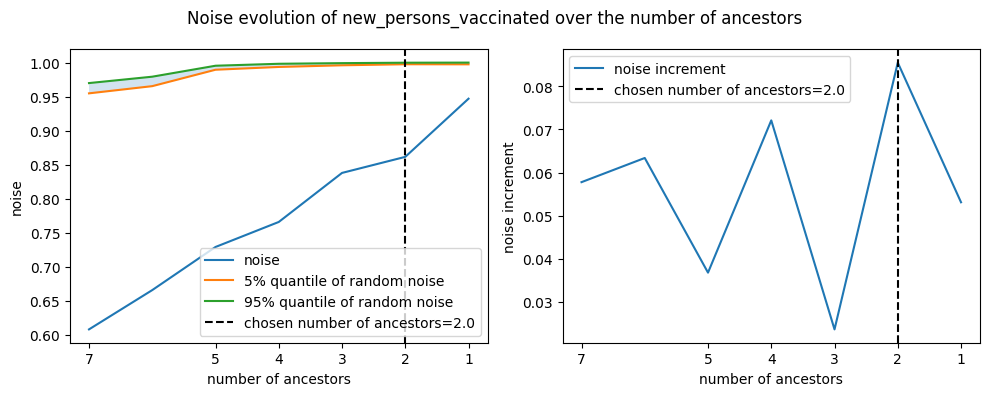

Ancestors of new_persons_vaccinated: ['stay_at_home_requirements', 'new_recovered']



In [12]:

graph_discovery_reduced=CHD.GraphDiscovery.from_dataframe(df_reduced,normalize=True,kernels=[0.1*LinearMode(),0.01*QuadraticMode(),0.001*GaussianMode(l=1)])
graph_discovery_reduced.fit()

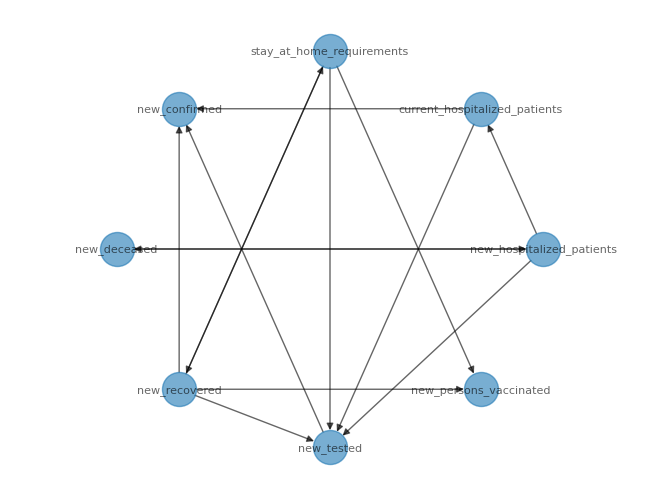

In [13]:
plot_a_network(graph_discovery_reduced.G,False)